In [276]:
import os
import tarfile
from six.moves import urllib
%matplotlib inline 

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "dataset/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, "housing.tgz")
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(tgz_path)
        housing_tgz.close()
fetch_housing_data()

In [277]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)


In [278]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [279]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [280]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


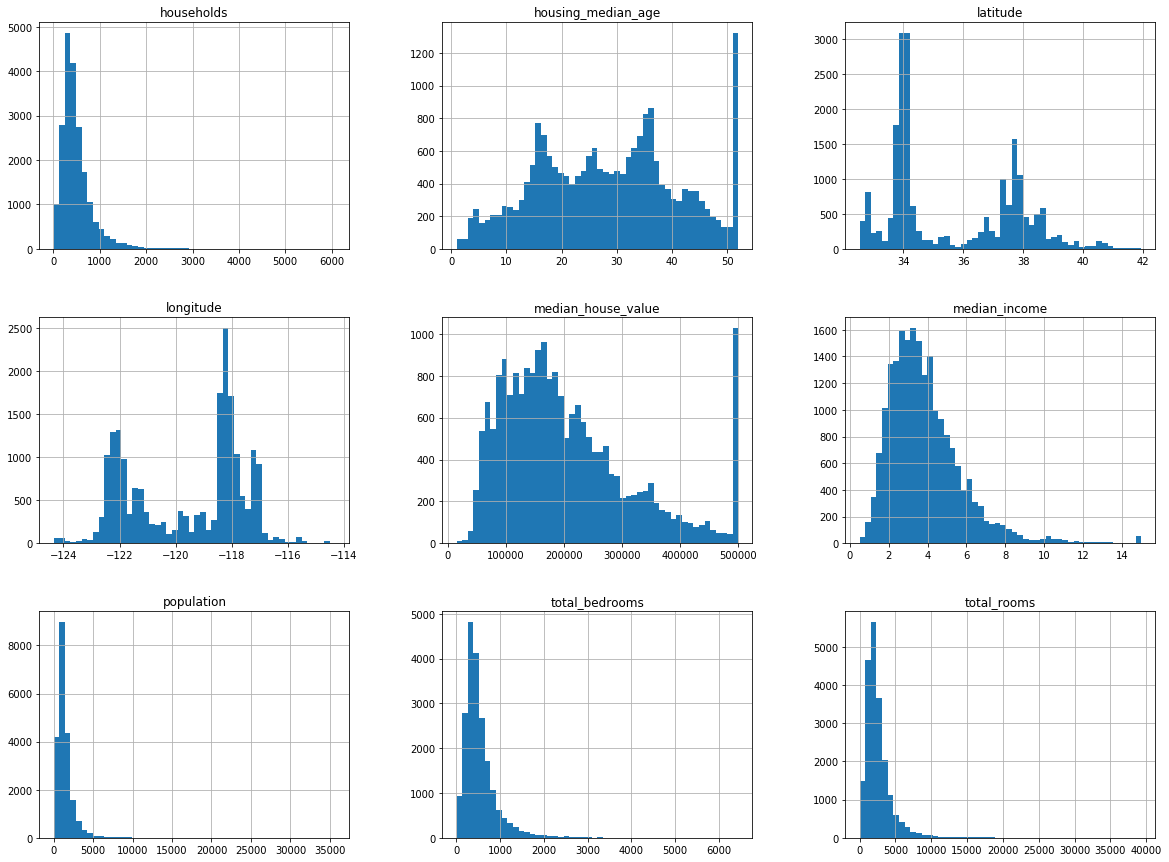

In [281]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [282]:
import numpy as np

np.random.seed(42)
def split_train_test(data, test_ratio):
    suffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = suffled_indices[:test_set_size]
    train_indices = suffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")


16512 train + 4128 test


In [283]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [284]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ratio,(hash)))
    return data.loc[~in_test_set], data.loc[in_test_set]

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


In [285]:
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY


In [286]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2,"id")
train_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


In [287]:
from sklearn.model_selection import train_test_split

train_set, test_set =  train_test_split(housing, test_size=0.2, random_state=42)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


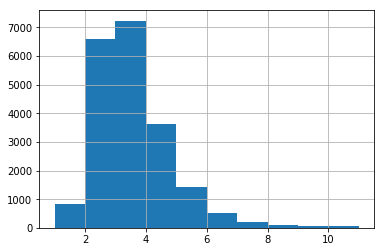

In [288]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].hist()
plt.show()
housing["income_cat"].where(housing["income_cat"] < 5 , 5.0,inplace = True)

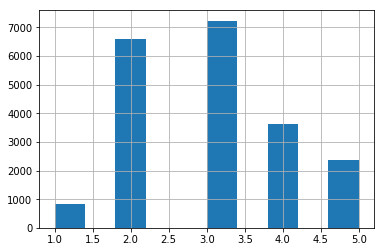

In [289]:
housing["income_cat"].hist()
plt.show()

In [290]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    print("TRAIN:", train_index, "TEST:",test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_train_set.head()

TRAIN: [17606 18632 14650 ..., 13908 11159 15775] TEST: [ 5241 10970 20351 ...,  4019 12107  2398]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


In [291]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [292]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [293]:
housing = strat_train_set.copy()

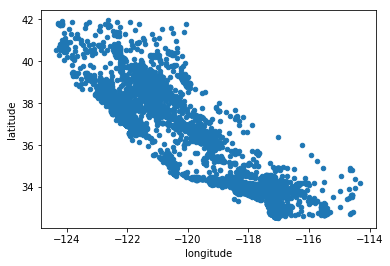

In [294]:
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

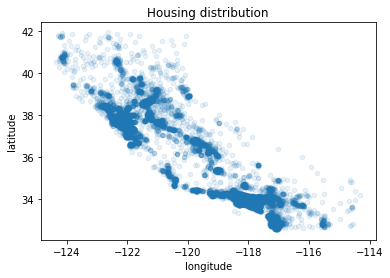

In [295]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,title="Housing distribution")
plt.show()

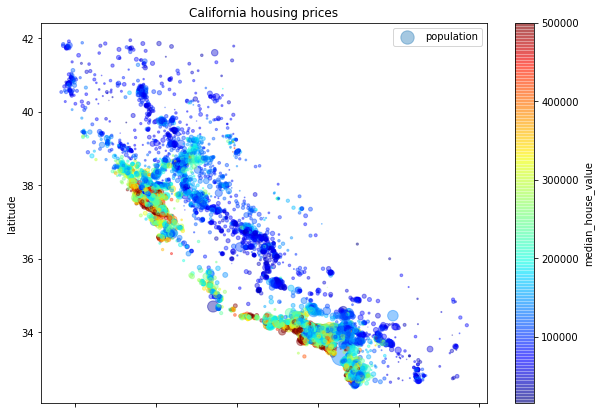

In [296]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", \
             figsize=(10,7),c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True, title="California housing prices")
plt.legend()

In [297]:
corr_matrix = housing.corr()

In [298]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae97acd9e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fae97c8bbe0>]], dtype=object)

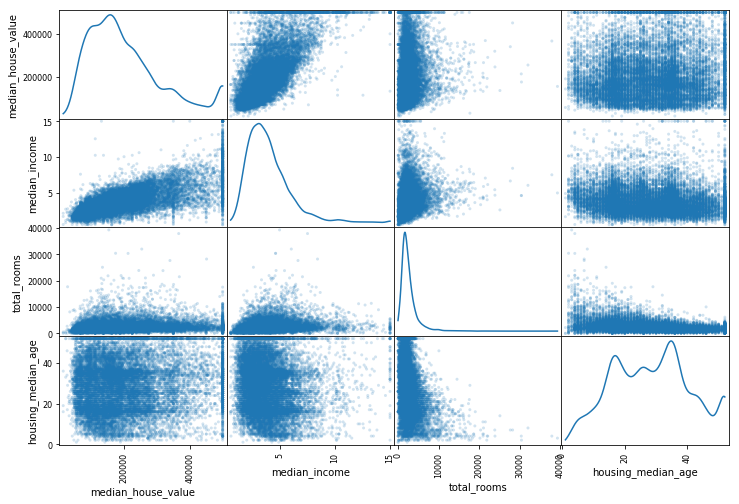

In [299]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8), alpha=0.2, diagonal='kde')

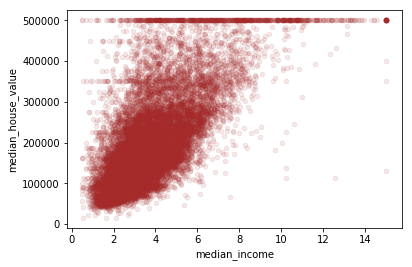

In [300]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1,c='brown')

In [301]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

_Revert to a Clean training set_

In [302]:
housing = strat_train_set.drop("median_house_value", axis =1 )
housing_labels = strat_train_set["median_house_value"].copy()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


_Data Cleaning_

In [303]:
housing.dropna(subset=["total_bedrooms"]).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16354.000000,16354.000000,16354.000000,16354.000000,16354.000000,16354.000000,16354.000000,16354.000000
mean,-119.575471,35.639354,28.641556,2624.246117,534.973890,1419.158860,496.999266,3.876957
std,2.001732,2.138251,12.581040,2141.933421,412.699041,1115.860053,375.485182,1.904516
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1445.000000,295.000000,784.000000,279.000000,2.567000
50%,-118.510000,34.260000,29.000000,2120.000000,433.000000,1164.000000,408.000000,3.543900
75%,-118.010000,37.720000,37.000000,3139.750000,644.000000,1716.000000,602.000000,4.747150
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


In [304]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [305]:
imputer.statistics_


array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [306]:
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [307]:
X = imputer.transform(housing_num)
X

array([[ -121.89  ,    37.29  ,    38.    , ...,   710.    ,   339.    ,
            2.7042],
       [ -121.93  ,    37.05  ,    14.    , ...,   306.    ,   113.    ,
            6.4214],
       [ -117.2   ,    32.77  ,    31.    , ...,   936.    ,   462.    ,
            2.8621],
       ..., 
       [ -116.4   ,    34.09  ,     9.    , ...,  2098.    ,   765.    ,
            3.2723],
       [ -118.01  ,    33.82  ,    31.    , ...,  1356.    ,   356.    ,
            4.0625],
       [ -122.45  ,    37.77  ,    52.    , ...,  1269.    ,   639.    ,
            3.575 ]])

In [308]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [309]:
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,533.998123,1419.790819,497.060380,3.875589
std,2.001860,2.138058,12.574726,2138.458419,410.839621,1115.686241,375.720845,1.904950
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566775
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.250000,602.000000,4.744475
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


_Handling Text and Categorical Attributes_

In [310]:
housing_cat = housing["ocean_proximity"]
housing_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

In [311]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:]

array([0, 0, 1, ..., 2, 0, 3])

In [312]:
housing_categories

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')

In [313]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [314]:
housing_cat_1hot.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [315]:
# from sklearn.preprocessing import CategoricalEncoder 
# cat_encoder = CategoricalEncoder()
# housing_cat_reshaped = housing_cat.values.reshape(-1,1)
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
# housing_cat_1hot



In [316]:
# cat_encoder = CategoricalEncoder(encoding="onehot-dense")
# housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
# housing_cat_1hot


In [317]:
#cat_encoder.categories_

_Custom Transformers_

In [318]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        

In [319]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ..., 
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

_Transformation Pipelines_

In [320]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [321]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
class Factorizer(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        cat_encoded, categories =  X[self.attribute_names].factorize()
        return cat_encoded.reshape(-1,1)

      
num_attribs = list(housing_num)
cat_attribs = "ocean_proximity"

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
#     ('selector', DataFrameSelector(cat_attribs)),
#    ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),
    ('factorize', Factorizer(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])

cat_pipeline.fit_transform(housing)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [347]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [323]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [324]:
housing_prepared.shape

(16512, 16)

### Select and Train a Model ###

_Training and Evaluating on the Training Set_

In [325]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
print(some_data, some_labels)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN   17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


In [326]:
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))


Predictions: [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]


In [327]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489219

In [328]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [329]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

_Cross Validation_

In [330]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
scores


array([ -4.80471151e+09,  -4.54801040e+09,  -4.93556890e+09,
        -4.83289688e+09,  -5.09171541e+09,  -5.39172408e+09,
        -4.98226256e+09,  -5.16756305e+09,  -5.67955495e+09,
        -4.99093556e+09])

In [331]:
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([ 69316.02634772,  67438.93828958,  70253.60415716,  69519.03966274,
        71356.25694452,  73428.36018864,  70585.14401389,  71885.76387585,
        75362.8220677 ,  70646.55374175])

In [332]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [ 69316.02634772  67438.93828958  70253.60415716  69519.03966274
  71356.25694452  73428.36018864  70585.14401389  71885.76387585
  75362.8220677   70646.55374175]
Mean: 70979.250929
Standard deviation: 2107.19360296


In [333]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean: 69052.4613635
Standard deviation: 2731.6740018


In [334]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22191.5169372333

In [335]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 52750.85638986  49835.49128983  51922.94685395  54302.93282483
  50645.49528175  55915.06580669  51529.96621558  51023.44619683
  54480.17980239  53081.53619732]
Mean: 52548.7916859
Standard deviation: 1822.21353584


## Fine-Tune Your Model ##

_Grid Search_

In [336]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features':[2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [337]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [338]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [339]:
cvres = grid_search.cv_results_

In [340]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score),params)

64548.1408338 {'max_features': 2, 'n_estimators': 3}
55367.897682 {'max_features': 2, 'n_estimators': 10}
52785.484814 {'max_features': 2, 'n_estimators': 30}
60270.4258899 {'max_features': 4, 'n_estimators': 3}
52692.3772981 {'max_features': 4, 'n_estimators': 10}
50588.0560164 {'max_features': 4, 'n_estimators': 30}
59342.4469431 {'max_features': 6, 'n_estimators': 3}
51856.7753451 {'max_features': 6, 'n_estimators': 10}
49855.7136919 {'max_features': 6, 'n_estimators': 30}
59245.9545638 {'max_features': 8, 'n_estimators': 3}
52513.982714 {'max_features': 8, 'n_estimators': 10}
50291.8753295 {'max_features': 8, 'n_estimators': 30}
62513.5720299 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54093.6013792 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61379.0745318 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52881.8268639 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59834.409802 {'bootstrap': False, 'max_features': 4, 'n_estimator

_Randomized Seardh_

In [341]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [342]:
feature_importances

array([  7.65930547e-02,   6.36885766e-02,   4.20346050e-02,
         1.74782715e-02,   1.61687720e-02,   1.77820881e-02,
         1.64543997e-02,   3.35634743e-01,   4.99089985e-02,
         1.10048274e-01,   8.41205740e-02,   1.12488165e-02,
         5.30591818e-03,   1.49984908e-01,   3.51454937e-03,
         3.34503051e-05])

In [343]:
final_model = grid_search.best_estimator_

In [344]:
final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [351]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_mse = np.sqrt(final_mse)
final_mse


76941.730967215146

In [360]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]
                                                                             
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=12)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................
[CV] C=10.0, kernel=linear ...........................................
[CV] C=10.0, kernel=linear ...........................................
[CV] C=10.0, kernel=linear ...........................................
[CV] C=10.0, kernel=linear ...........................................
[CV] C=30.0, kernel=linear ...........................................
[CV] C=30.0, kernel=linear ...........................................
[CV] C=30.0, kernel=linear ...........................................
[CV] C=30.0, kernel=linear ...........................................
[CV] C=30.0, kernel=linear ...........................................
[CV] C=100.0, kernel=linear ..........................................
[CV] C=100.0, kernel=linear ..........................................
[CV] ........................... C=100.0, kernel=linear, total=  13.5s
[CV] C=100.0, k

[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:   48.6s


[CV] ........................... C=300.0, kernel=linear, total=  16.8s
[CV] C=3000.0, kernel=linear .........................................
[CV] ........................... C=300.0, kernel=linear, total=  17.0s
[CV] C=10000.0, kernel=linear ........................................
[CV] ........................... C=300.0, kernel=linear, total=  17.0s
[CV] C=10000.0, kernel=linear ........................................
[CV] ........................... C=300.0, kernel=linear, total=  17.2s
[CV] C=10000.0, kernel=linear ........................................
[CV] .......................... C=1000.0, kernel=linear, total=  17.2s
[CV] C=10000.0, kernel=linear ........................................
[CV] .......................... C=1000.0, kernel=linear, total=  17.3s
[CV] C=10000.0, kernel=linear ........................................
[CV] .......................... C=1000.0, kernel=linear, total=  18.0s
[CV] C=30000.0, kernel=linear ........................................
[CV] .

[CV] .................... C=3.0, gamma=0.03, kernel=rbf, total=  25.0s
[CV] C=3.0, gamma=0.3, kernel=rbf ....................................
[CV] .................... C=3.0, gamma=0.03, kernel=rbf, total=  25.7s
[CV] C=3.0, gamma=0.3, kernel=rbf ....................................
[CV] .................... C=3.0, gamma=0.03, kernel=rbf, total=  25.1s
[CV] C=3.0, gamma=0.3, kernel=rbf ....................................
[CV] .................... C=3.0, gamma=0.03, kernel=rbf, total=  31.3s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=3.0, gamma=0.1, kernel=rbf, total=  30.5s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] .................... C=3.0, gamma=0.03, kernel=rbf, total=  31.6s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] ..................... C=3.0, gamma=0.1, kernel=rbf, total=  30.5s
[CV] C=3.0, gamma=1.0, kernel=rbf ....................................
[CV] .

[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=  32.3s
[CV] C=30.0, gamma=0.3, kernel=rbf ...................................
[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=  31.8s
[CV] C=30.0, gamma=0.3, kernel=rbf ...................................
[CV] ................... C=30.0, gamma=0.01, kernel=rbf, total=  32.2s
[CV] C=30.0, gamma=0.3, kernel=rbf ...................................
[CV] ................... C=30.0, gamma=0.03, kernel=rbf, total=  31.2s
[CV] C=30.0, gamma=0.3, kernel=rbf ...................................
[CV] ................... C=30.0, gamma=0.03, kernel=rbf, total=  31.7s
[CV] C=30.0, gamma=0.3, kernel=rbf ...................................


[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:  8.0min


[CV] ................... C=30.0, gamma=0.03, kernel=rbf, total=  25.2s
[CV] C=30.0, gamma=1.0, kernel=rbf ...................................
[CV] ................... C=30.0, gamma=0.03, kernel=rbf, total=  25.7s
[CV] C=30.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=30.0, gamma=0.1, kernel=rbf, total=  30.5s
[CV] C=30.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=30.0, gamma=0.1, kernel=rbf, total=  24.9s
[CV] C=30.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=30.0, gamma=0.1, kernel=rbf, total=  30.3s
[CV] C=30.0, gamma=1.0, kernel=rbf ...................................
[CV] .................... C=30.0, gamma=0.1, kernel=rbf, total=  30.8s
[CV] C=30.0, gamma=3.0, kernel=rbf ...................................
[CV] .................... C=30.0, gamma=0.1, kernel=rbf, total=  31.0s
[CV] C=30.0, gamma=3.0, kernel=rbf ...................................
[CV] .

[CV] .................. C=300.0, gamma=0.01, kernel=rbf, total=  30.6s
[CV] C=300.0, gamma=0.3, kernel=rbf ..................................
[CV] .................. C=300.0, gamma=0.03, kernel=rbf, total=  29.6s
[CV] C=300.0, gamma=0.3, kernel=rbf ..................................
[CV] .................. C=300.0, gamma=0.03, kernel=rbf, total=  30.0s
[CV] C=300.0, gamma=1.0, kernel=rbf ..................................
[CV] .................. C=300.0, gamma=0.03, kernel=rbf, total=  30.5s
[CV] C=300.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=0.1, kernel=rbf, total=  24.1s
[CV] C=300.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=0.1, kernel=rbf, total=  23.8s
[CV] C=300.0, gamma=1.0, kernel=rbf ..................................
[CV] ................... C=300.0, gamma=0.1, kernel=rbf, total=  29.4s
[CV] C=300.0, gamma=1.0, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=12)]: Done 250 out of 250 | elapsed: 15.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=12,
       param_grid=[{'kernel': ['linear'], 'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0, 10000.0, 30000.0]}, {'kernel': ['rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [361]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70363.903139641669

In [363]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}